In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def df_ref_utlima(path, com):
    '''Esta funcao recebe o caminho do arquivo path e o nome do parametor com e retorna o parametro escolhido'''
    '''Parametros com: morse,erro_morse,nome_morse,stacking,erro_stacking,nome_stacking'''
    import sys
    D=[]
    k=[]
    morse=[]
    erro_morse=[]
    nome_morse=[]
    stacking=[]
    erro_stacking=[]
    nome_stacking=[]
    filep = open(path,'r')
    #separa os valores dos parametros e os desvios
    #estoca o valor em uma linha e na proxima linha o desvio deste parametro
    for line in filep:
        line=line.strip()
        if ":morse.D" in line:
            #valor do parametro de Morse e erro
            morse.append(float(line.split(' ')[1])*1000)
            erro_morse.append(float(line.split(' ')[2])*1000)
            nome_morse.append(line.split(':')[0])
            #print(f"{line.split(':')[0]},{float(line.split(' ')[1])*100}, {float(line.split(' ')[2])*100} ")
        elif ":harmonic.k" in line:
            #valor do parametro de empilhamento e erro
            stacking.append(float(line.split(' ')[1])*100)
            erro_stacking.append(float(line.split(' ')[2])*100)
            nome_stacking.append(line.split(':')[0])
            #for i in range(len(nome_stacking)):
            #print(f"{line.split(':')[0]},{float(line.split(' ')[1])*100}, {float(line.split(' ')[2])*100} ")
    if com== "morse":
        return morse

    if com== "erro_morse":
        return erro_morse

    if com== "nome_morse":
        return nome_morse
    
    if com== "stacking":
        return stacking

    if com== "erro_stacking":
        return erro_stacking
            
    if com== "nome_stacking":
        return nome_stacking
def func_df(path, param):
    
    '''esta funcao recebe o caminho do aquivo de dados tipo av-std.da
    e retorna um dataframe com morse e o stacking, se param= morse ou empilhamento, 
    respectivamente'''
    a=df_ref_utlima(path, 'morse')
    b=df_ref_utlima(path, 'nome_morse')
    c=df_ref_utlima(path, 'erro_morse')
    d=df_ref_utlima(path, 'stacking')
    e=df_ref_utlima(path, 'nome_stacking')
    f=df_ref_utlima(path, 'erro_stacking')
    df_morse=pd.DataFrame({
        'parametro':b,
        'morse':a,
        'erro':c
        })
    df_stacking=pd.DataFrame({
    'parametro':e,
    'empilhamento':d,
    'erro':f})
    if param=='morse':
        return df_morse
    elif param=='empilhamento':
        return df_stacking

In [2]:
'''def df_solve(path1, path2, nome, parametro):
    esta funcao recebe dois caminhos, um da referencia e outro do arquivo tratado e retorna um df com o nome escolhido
    globals()['nome']=nome
    globals()['parametro']=parametro
    df_parametro_nome_1=func_df(path1,'morse').sort_values(by=['parametro'])
    df_parametro_nome_2=func_df(path2,'morse').sort_values(by=['parametro'])
    parametro_nome_1=[]
    parametro_nome_2=[]
    if parametro= 'morse':
        morse_alto=[]
        morse_baixo=[]
        morse_alto_ref=[]
        morse_baixo_ref=[]
        for i in df_parametro_nome_1['parametro']:
            parametro_alto.append(df_morse_alto_ref[df_morse_alto_ref['parametro']==i]['parametro'].values[0])
            morse_alto.append(df_morse_alto_tratado[df_morse_alto_tratado['parametro']==i]['morse'].values[0])
            morse_alto_ref.append(df_morse_alto_ref[df_morse_alto_ref['parametro']==i]['morse'].values[0])
            morse_baixo.append(df_morse_baixo_tratado[df_morse_baixo_tratado['parametro']==i]['morse'].values[0])
            morse_baixo_ref.append(df_morse_baixo_ref[df_morse_baixo_ref['parametro']==i]['morse'].values[0])
            parametro_baixo.append(df_morse_baixo_ref[df_morse_baixo_ref['parametro']==i]['parametro'].values[0])
    return 
path1="/home/daniel/Desktop/Doutorado/dados/2ome_e_bases_metiladas/2ome_rna/120mm/2024_05_07/2ome-av-std.dat"
##arquivo de parametros referencia
path2="/home/daniel/Desktop/Doutorado/dados/2ome_e_bases_metiladas/2ome_rna/120mm/ref.par"
df=df_solve(path1, path2, 'ome2')
df'''

'def df_solve(path1, path2, nome, parametro):\n    esta funcao recebe dois caminhos, um da referencia e outro do arquivo tratado e retorna um df com o nome escolhido\n    globals()[\'nome\']=nome\n    globals()[\'parametro\']=parametro\n    df_parametro_nome_1=func_df(path1,\'morse\').sort_values(by=[\'parametro\'])\n    df_parametro_nome_2=func_df(path2,\'morse\').sort_values(by=[\'parametro\'])\n    parametro_nome_1=[]\n    parametro_nome_2=[]\n    if parametro= \'morse\':\n        morse_alto=[]\n        morse_baixo=[]\n        morse_alto_ref=[]\n        morse_baixo_ref=[]\n        for i in df_parametro_nome_1[\'parametro\']:\n            parametro_alto.append(df_morse_alto_ref[df_morse_alto_ref[\'parametro\']==i][\'parametro\'].values[0])\n            morse_alto.append(df_morse_alto_tratado[df_morse_alto_tratado[\'parametro\']==i][\'morse\'].values[0])\n            morse_alto_ref.append(df_morse_alto_ref[df_morse_alto_ref[\'parametro\']==i][\'morse\'].values[0])\n            morse_b

In [3]:
#baixo sal
#arquivo de parametros tratado
path="/home/daniel/Desktop/Doutorado/dados/2ome_e_bases_metiladas/2ome_rna/120mm/2024_05_07/2ome-av-std.dat"
##arquivo de parametros referencia
path1="/home/daniel/Desktop/Doutorado/dados/2ome_e_bases_metiladas/2ome_rna/120mm/ref.par"
#carregando os dataframes para cada conjunto de parametros em baixo sal
df_morse_baixo_ref=func_df(path1,'morse').sort_values(by=['parametro'])
df_morse_baixo_tratado=func_df(path,'morse').sort_values(by=['parametro'])
df_stacking_baixo_tratado=func_df(path,'empilhamento').sort_values(by=['parametro'])
df_stacking_baixo_ref=func_df(path1,'empilhamento').sort_values(by=['empilhamento'])
#df_stacking_baixo_ref

In [4]:
#alto sal 
#arquivo de parametros tratado
path="/home/daniel/Desktop/Doutorado/dados/2ome_e_bases_metiladas/2ome_rna/1020mm/2024_05_07/2ome-av-std.dat"
#arquivo de parametros referencia
path1="/home/daniel/Desktop/Doutorado/dados/2ome_e_bases_metiladas/2ome_rna/1020mm/ref.par"
#carregando os dataframes para cada conjunto de parametros em alto sal
df_morse_alto_ref=func_df(path1,'morse').sort_values(by=['parametro'])
df_morse_alto_tratado=func_df(path,'morse').sort_values(by=['parametro'])
df_stacking_alto_tratado=func_df(path,'empilhamento').sort_values(by=['parametro'])
df_stacking_alto_ref=func_df(path1,'empilhamento').sort_values(by=['empilhamento'])
#df_stacking_alto_ref

In [5]:
#construindo os dataframess para o parametro de morse em baixo e alto sal
parametro_alto=[]
parametro_baixo=[]
morse_alto=[]
morse_alto_ref=[]
morse_baixo_ref=[]
morse_baixo=[]
for i in df_morse_alto_ref['parametro']:
    parametro_alto.append(df_morse_alto_ref[df_morse_alto_ref['parametro']==i]['parametro'].values[0])
    morse_alto.append(df_morse_alto_tratado[df_morse_alto_tratado['parametro']==i]['morse'].values[0])
    morse_alto_ref.append(df_morse_alto_ref[df_morse_alto_ref['parametro']==i]['morse'].values[0])
    morse_baixo.append(df_morse_baixo_tratado[df_morse_baixo_tratado['parametro']==i]['morse'].values[0])
    morse_baixo_ref.append(df_morse_baixo_ref[df_morse_baixo_ref['parametro']==i]['morse'].values[0])
    parametro_baixo.append(df_morse_baixo_ref[df_morse_baixo_ref['parametro']==i]['parametro'].values[0])

In [6]:
#construindo os dataframes para o empilhamento em baixo e alto sal
parametro_emp_alto=[]
parametro_emp_baixo=[]
stacking_alto=[]
stacking_alto_ref=[]
stacking_baixo=[]
stacking_baixo_ref=[]
for i in df_stacking_alto_ref['parametro']:
    parametro_emp_alto.append(df_stacking_alto_ref[df_stacking_alto_ref['parametro']==i]['parametro'].values[0])
    stacking_alto.append(df_stacking_alto_tratado[df_stacking_alto_tratado['parametro']==i]['empilhamento'].values[0])
    stacking_alto_ref.append(df_stacking_alto_ref[df_stacking_alto_ref['parametro']==i]['empilhamento'].values[0])
    stacking_baixo.append(df_stacking_baixo_tratado[df_stacking_baixo_tratado['parametro']==i]['empilhamento'].values[0])
    stacking_baixo_ref.append(df_stacking_baixo_ref[df_stacking_baixo_ref['parametro']==i]['empilhamento'].values[0])
    parametro_emp_baixo.append(df_stacking_baixo_ref[df_stacking_baixo_ref['parametro']==i]['parametro'].values[0])

In [7]:
#juntando as informacoes para empilhamento em um so df

df_stacking=pd.DataFrame({
    'stacking HS':parametro_emp_alto,
    'ref HS':stacking_alto_ref,
    'HS':stacking_alto,
    'stacking LS':parametro_emp_baixo,
    'ref LS':stacking_baixo_ref,
    'LS':stacking_baixo
})

#juntando as informacoe para o morse em um so df
df_morse=pd.DataFrame({
    'morse alto':parametro_alto,
    'ref HS':morse_alto_ref,
    'HS':morse_alto,
    'morse baixo':parametro_baixo,
    'ref LS':morse_baixo_ref,
    'LS':morse_baixo 
})
#inserindo a variacao dos parametros de stacking em relacao a referencia nos df
df_stacking['$\Delta$ LS']=df_stacking['LS']-df_stacking['ref LS']
df_stacking['$\Delta$ HS']=df_stacking['HS']-df_stacking['ref HS']
df_stacking['$\Delta$ LS(%)']=abs(df_stacking['LS']-df_stacking['ref LS'])/df_stacking['ref LS']
df_stacking['$\Delta$ HS(%)']=abs(df_stacking['HS']-df_stacking['ref HS'])/df_stacking['ref HS']
df_morse['$\Delta$ LS']=df_morse['LS']-df_morse['ref LS']
df_morse['$\Delta$ HS']=df_morse['HS']-df_morse['ref HS']
df_morse['$\Delta$ LS(%)']=abs(df_morse['LS']-df_morse['ref LS'])/df_morse['ref LS']
df_morse['$\Delta$ HS(%)']=abs(df_morse['HS']-df_morse['ref HS'])/df_morse['ref HS']

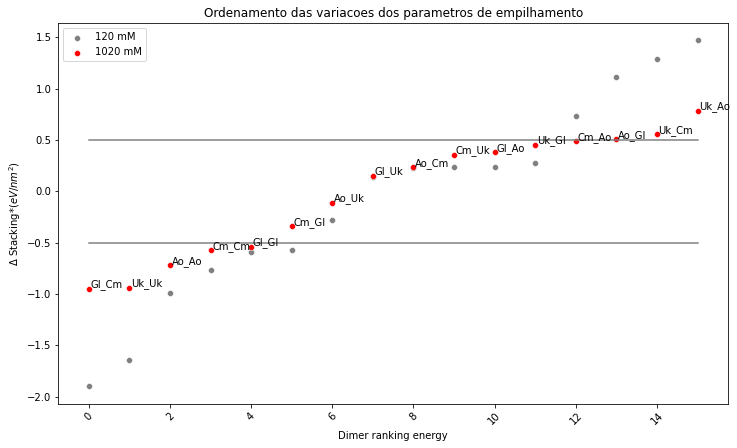

In [8]:
#fazer um grafico para avaliar se ordenando os termos eles apresentam algum padrao
#para avaliar os parametros em alto sal
#configurando a janela do grafico
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=45)
plt.ylabel('$\Delta$ Stacking*($eV/nm^2$)')
plt.xlabel('Dimer ranking energy')
plt.title('Ordenamento das variacoes dos parametros de empilhamento')
#ordenando segundo as variacoes em relacao ao arquivo de referencia para cada conjunto LS e HS
df_120=df_stacking.sort_values(by=["$\Delta$ LS"])
df_1020=df_stacking.sort_values(by=["$\Delta$ HS"])
#parametro ordinario
x=[i for i in range(len(df_120['$\Delta$ LS']))]

#listas de valores ordenados
y120=df_120['$\Delta$ LS']
y1020=df_1020['$\Delta$ HS']
z120=df_120['stacking LS']
z1020=df_1020['stacking HS']
n=len(df_stacking['$\Delta$ HS'])
#retas em -0.5 e +0.5
sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[0.5 for i in range(n)],color='grey')
#grafico de pontos para LS
chart1 = sns.scatterplot(x=x, y=y120,label='120 mM',color='grey')
#grafico de pontos para HS
chart2 = sns.scatterplot(x=x, y=y1020,label='1020 mM' ,color='r')
for xi, yi, text in zip(x, y1020, z1020):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

plt.show()

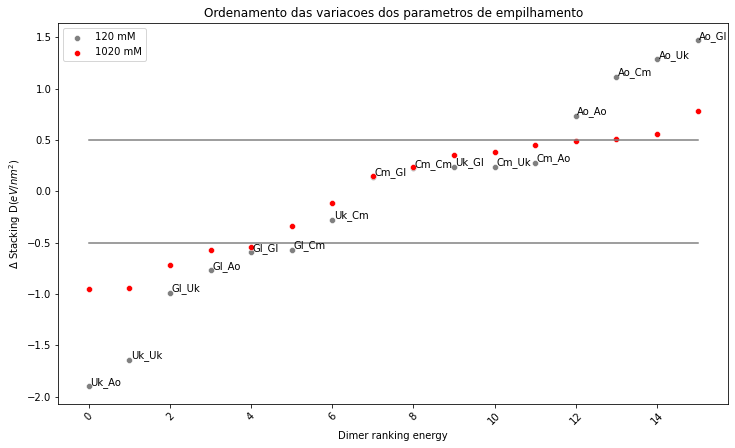

In [9]:
#fazer um grafico para avaliar se ordenando os termos eles apresentam algum padrao
#para avaliar os parametros em alto sal
#configurando a janela do grafico
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=45)
plt.ylabel('$\Delta$ Stacking D($eV/nm^2$)')
plt.xlabel('Dimer ranking energy')
plt.title('Ordenamento das variacoes dos parametros de empilhamento')
#ordenando segundo as variacoes em relacao ao arquivo de referencia para cada conjunto LS e HS
df_120=df_stacking.sort_values(by=["$\Delta$ LS"])
df_1020=df_stacking.sort_values(by=["$\Delta$ HS"])
#parametro ordinario
x=[i for i in range(len(df_120['$\Delta$ LS']))]

#listas de valores ordenados
y120=df_120['$\Delta$ LS']
y1020=df_1020['$\Delta$ HS']
z120=df_120['stacking LS']
z1020=df_120['stacking HS']
n=len(df_stacking['$\Delta$ LS'])
#retas em -0.5 e +0.5
sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[0.5 for i in range(n)],color='grey')
#grafico de pontos para LS
chart1 = sns.scatterplot(x=x, y=y120,label='120 mM',color='grey')
#grafico de pontos para HS
chart2 = sns.scatterplot(x=x, y=y1020,label='1020 mM' ,color='r')
for xi, yi, text in zip(x, y120, z120):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

plt.show()

<AxesSubplot:xlabel='stacking HS', ylabel='$\\Delta$ LS(%)'>

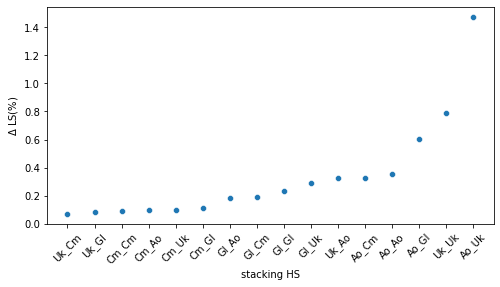

In [10]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
#df_stacking.drop("stacking LS", axis=1, inplace=True)
df_stacking.sort_values(by=["$\Delta$ LS(%)"], inplace=True)
# Avaliar se o ordenamento com \Delta (%) LS criou algum padrao
#sns.pairplot(df_stacking)
sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ LS(%)"])

<AxesSubplot:xlabel='stacking HS', ylabel='$\\Delta$ HS(%)'>

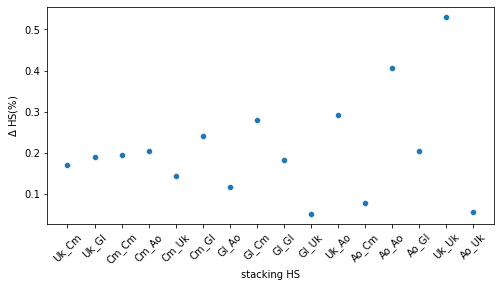

In [11]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)#
df_stacking.drop("stacking LS", axis=1, inplace=True)
df_stacking.sort_values(by=["$\Delta$ LS(%)"], inplace=True)
# Avaliar se o ordenamento com \Delta (%) LS criou algum padrao
#sns.pairplot(df_stacking)
sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ HS(%)"])

Text(0, 0.5, '$\\Delta$k(%)')

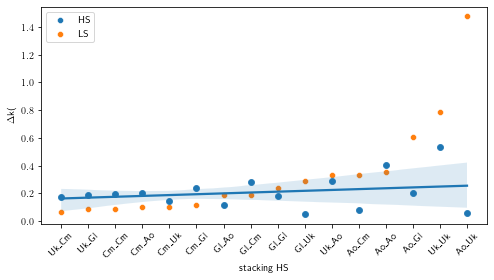

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar Matplotlib para usar LaTeX
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{underscore}'

plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)

#df_stacking.drop("stacking LS", axis=1, inplace=True)
#plt.gca().set_xticklabels([])
df_stacking.sort_values(by=["$\Delta$ LS(%)"], inplace=True)
# Avaliar se o ordenamento com \Delta (%) LS criou algum padrao
#sns.pairplot(df_stacking)
sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ HS(%)"], label='HS')
sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ LS(%)"], label='LS')
sns.regplot(x=[i for i in range(len(df_stacking["stacking HS"]))],y=df_stacking["$\Delta$ HS(%)"])
#sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ LS(%)"])
plt.ylabel("$\Delta$k(%)")
#plt.xlabel("Stacking parameter")
#plt.title(r'Exemplo de Rótulos com \underscore{A}')

    As variacoes percentuais seguem uma tendencia de subida bem definida para o conjunto LS em relacao ao parametro de referencia. Alguns parametros de primeiros vizinhos do conjunto HS apresentam variacoes semelhantes as apresentadas para o conjunto LS ('Uk_Cm', 'Uk_Gl', 'Cm_Cm', 'Cm_Ao', 'Cm_Uk', 'Gl_Ao', 'Gl_Gl','Cm_Gl', 'Gl_Cm', 'Uk_Ao', 'Ao_Cm', 'Ao_Ao', 'Uk_Uk'), porem os valores de parametros de empilhamento para o conjunto 'Gl_Uk', 'Ao_Cm', 'Ao_Gl','Ao_Uk' apresentam maior distanciamento da tendencia de variacao de LS, com variacoes menores, que levam a um comportamento aproximadamento linear das variacoes par o conjunto. Isto mostra que 
     

In [13]:
def nome(k_name):
    a=k_name.split('_')[0]
    b=k_name.split('_')[1]
    c=f"\\underscore{a}+'p'+\\underscore{b}"
    return c

In [14]:
nomes=list(map(nome,df_stacking['stacking HS']))
df_stacking['nomes']=nomes

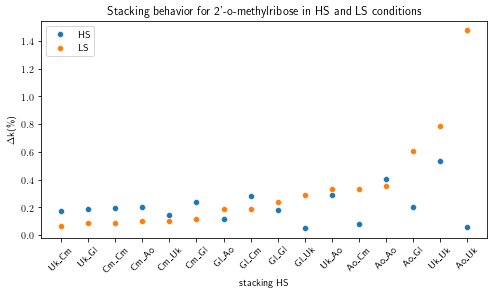

In [15]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.title("Stacking behavior for 2\'-o-methylribose in HS and LS conditions")
#df_stacking.drop("stacking LS", axis=1, inplace=True)
#plt.gca().set_xticklabels([])
df_stacking.sort_values(by=["$\Delta$ LS(%)"], inplace=True)
# Avaliar se o ordenamento com \Delta (%) LS criou algum padrao
#sns.pairplot(df_stacking)

sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ HS(%)"], label='HS')
sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ LS(%)"], label='LS')
#sns.regplot(x=[i for i in range(len(df_stacking["stacking HS"]))],y=df_stacking["$\Delta$ HS(%)"],scatter_kws={'s':2})
#sns.scatterplot(x=df_stacking["stacking HS"],y=df_stacking["$\Delta$ LS(%)"])
plt.ylabel("$\Delta$k(\%)")
#plt.xlabel("Stacking parameter")
plt.savefig("stk_bhvr.svg", format="svg")

In [16]:
df_stacking['stacking HS']=['U\\ma\\!pC\\mg', 'U\\ma\\!pG\\mc', 'C\\mg\\!pC\\mg', 'C\\mg\\!pA\\um', 'C\\mg\\!pU\\ma', 'C\\mg\\!pG\\mc', 'G\\mc\\!pA\\um',
       'G\\mc\\!pC\\mg', 'G\\mc\\!pG\\mc', 'G\\mc\\!pU\\ma', 'U\\ma\\!pA\\um', 'A\\um\\!pC\\mg', 'A\\um\\!pA\\um', 'A\\um\\!pG\\mc',
       'U\\ma\\!pU\\ma', 'A\\um\\!pU\\ma']

In [17]:
#df_stacking.drop("stacking LS", axis=1, inplace=True)
df_stacking

,stacking HS,ref HS,HS,ref LS,LS,$\Delta$ LS,$\Delta$ HS,$\Delta$ LS(%),$\Delta$ HS(%),nomes
14,U\ma\!pC\mg,3.2519,3.8047,4.1460,3.8670,-0.2790,0.5528,0.067294,0.169993,\underscoreUk+'p'+\underscoreCm
5,U\ma\!pG\mc,2.3929,2.8447,2.8434,3.0797,0.2363,0.4518,0.083105,0.188809,\underscoreUk+'p'+\underscoreGl
9,C\mg\!pC\mg,2.9580,2.3845,2.5111,2.7343,0.2232,-0.5735,0.088885,0.193881,\underscoreCm+'p'+\underscoreCm
4,C\mg\!pA\um,2.3929,2.8805,2.8434,3.1218,0.2784,0.4876,0.097911,0.203769,\underscoreCm+'p'+\underscoreAo
7,C\mg\!pU\ma,2.4767,2.8295,2.4275,2.6659,0.2384,0.3528,0.098208,0.142448,\underscoreCm+'p'+\underscoreUk
0,C\mg\!pG\mc,1.4204,1.0790,1.2449,1.3879,0.1430,-0.3414,0.114869,0.240355,\underscoreCm+'p'+\underscoreGl
13,G\mc\!pA\um,3.2519,3.6296,4.1460,3.3759,-0.7701,0.3777,0.185745,0.116147,\underscoreGl+'p'+\underscoreAo
15,G\mc\!pC\mg,3.3911,2.4416,3.0301,2.4621,-0.5680,-0.9495,0.187453,0.279998,\underscoreGl+'p'+\underscoreCm
10,G\mc\!pG\mc,2.9580,2.4199,2.5111,1.9174,-0.5937,-0.5381,0.236430,0.181913,\underscoreGl+'p'+\underscoreGl
12,G\mc\!pU\ma,3.0339,3.1854,3.3936,2.4047,-0.9889,0.1515,0.291401,0.049936,\underscoreGl+'p'+\underscoreUk


In [18]:
import pandas as pd
import numpy as np
import os
#gerando o arquivo com a tabela formato pdf.
lines_inicio=['\\documentclass[12pt]{article}\n',
              '\\usepackage{cancel}\n',
              '\\usepackage{amsmath}\n',
              '\\usepackage[flushleft]{threeparttable}\n',
              '\\usepackage{makecell,booktabs}\n',
              '\\usepackage[utf8]{inputenc}\n',
              '\\usepackage[brazil]{babel}\n',
              '\\title{Aplicação de modelo mesoscópico no estudo\n',
              'da estabilidade de DNA e RNA com ácidos nucleicos metilados}\n',
              '\\author{Daniel de Jesus}\n',
              '\\date{UFMG 2020/2}\n',
              '\\usepackage[T1]{fontenc}\n',
              '\\usepackage[pdftex]{graphicx}\n',
              '\\usepackage{indentfirst}\n',
              '\\usepackage{times}\n',
              '\\usepackage[margin=2.5cm]{geometry}\n',
              '\\usepackage{setspace}\n',
              '\\usepackage[rightcaption]{sidecap}\n',
              '\\usepackage{caption}\n',
              '\\captionsetup{singlelinecheck=false,font=small,labelsep=newline,labelfont={sf,bf}}\n',
              '\\usepackage[numbers,sort&compress]{natbib}\n',
              '\\usepackage[sf,bf]{titlesec}\n',
              '\\titleclass\\section{top}\n',
              '\\usepackage{fancyhdr}\n',
              '\\usepackage{amsmath}\n',
              '\\bibliographystyle{unsrtnat}\n',
              '\\onehalfspace\n',
              '\\usepackage{booktabs}\n',
              '\\usepackage{longtable}\n',
              '\\usepackage{floatrow}\n',
              '\\DeclareFloatFont{tiny}{\\footnotesize}% "scriptsize" is defined by floatrow, "tiny" not\n',
              '\\floatsetup[table]{font=tiny}\n',
              '\\usepackage{gensymb}\n',
              '\\usepackage{chemfig}\n',
              '\\renewcommand*\\printatom[1]{\\ensuremath{\\mathsf{#1}}}\n',
              '\\usepackage{tikz}\n',
              '\\usepackage[version=4]{mhchem}\n',
              '\\usepackage{hyperref}\n',
              '\\usepackage{multirow}\n',
              '\\usepackage{acro}[=version3]\n',
              '\\begin{document}\n',]

pdf=open('morse_2ome.tex','w')
pdf.writelines(lines_inicio)
print(df_morse.to_latex(), file=pdf)
lines_fim= ['\\end{document}\n']
pdf.writelines(lines_fim)
pdf.close()
#compilando o pdf da tabela
os.system('pdflatex morse_2ome.tex' )
#os.system('okular 1ma_tabela_de_dados.pdf')

pdf=open('stacking_2ome.tex','w')
pdf.writelines(lines_inicio)
print(df_stacking.to_latex(), file=pdf)
lines_fim= ['\\end{document}\n']
pdf.writelines(lines_fim)
pdf.close()
#compilando o pdf da tabela
#os.system('stacking_2ome.tex' )
#os.system('okular stacking_2ome.pdf')

/tmp/ipykernel_17295/2419595870.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_morse.to_latex(), file=pdf)


This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/TeX Live for SUSE Linux) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./morse_2ome.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 50 language(s) loaded.
(/usr/share/texmf/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texmf/tex/latex/base/size12.clo))
(/usr/share/texmf/tex/latex/cancel/cancel.sty)
(/usr/share/texmf/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texmf/tex/latex/amsmath/amstext.sty
(/usr/share/texmf/tex/latex/amsmath/amsgen.sty))
(/usr/share/texmf/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texmf/tex/latex/amsmath/amsopn.sty))
(/usr/share/texmf/tex/latex/threeparttable/threeparttable.sty)
(/usr/share/texmf/tex/latex/makecell/makecell.sty
(/usr/share/texmf/tex/latex/tools/array.sty))
(/usr/share/texmf/tex/latex/booktabs/booktabs.sty)
(/usr/sh

(/usr/share/texmf/tex/latex/l3packages/xparse/xparse.sty)))
(/usr/share/texmf/tex/latex/hyperref/hyperref.sty
(/usr/share/texmf/tex/generic/oberdiek/hobsub-hyperref.sty
(/usr/share/texmf/tex/generic/oberdiek/hobsub-generic.sty))
(/usr/share/texmf/tex/latex/oberdiek/auxhook.sty)
(/usr/share/texmf/tex/latex/oberdiek/kvoptions.sty)
(/usr/share/texmf/tex/latex/hyperref/pd1enc.def)
(/usr/share/texmf/tex/latex/latexconfig/hyperref.cfg)
(/usr/share/texmf/tex/latex/url/url.sty))

Package hyperref Message: Driver (autodetected): hpdftex.

(/usr/share/texmf/tex/latex/hyperref/hpdftex.def
(/usr/share/texmf/tex/latex/oberdiek/rerunfilecheck.sty))
(/usr/share/texmf/tex/latex/multirow/multirow.sty)
(/usr/share/texmf/tex/latex/acro/acro.sty
(/usr/share/texmf/tex/latex/l3packages/xtemplate/xtemplate.sty)
(/usr/share/texmf/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texmf/tex/latex/oberdiek/zref-abspage.sty
(/usr/share/texmf/tex/latex/oberdiek/zref-base.sty))
(/usr/share/texmf/tex/latex/translations/t

/tmp/ipykernel_17295/2419595870.py:59: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_stacking.to_latex(), file=pdf)


In [19]:
df_morse

,morse alto,ref HS,HS,morse baixo,ref LS,LS,$\Delta$ LS,$\Delta$ HS,$\Delta$ LS(%),$\Delta$ HS(%)
0,Ao,41.576,29.720,Ao,36.777,35.348,-1.429,-11.856,0.038856,0.285165
1,Cm,66.746,77.391,Cm,75.614,78.300,2.686,10.645,0.035523,0.159485
2,Gl,66.746,76.047,Gl,75.614,80.484,4.870,9.301,0.064406,0.139349
3,Uk,41.576,30.736,Uk,36.777,36.833,0.056,-10.840,0.001523,0.260727


<AxesSubplot:>

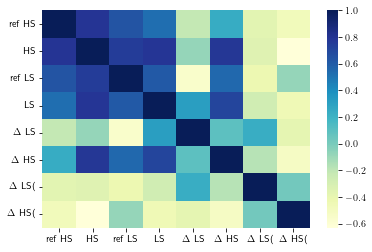

In [20]:
df=df_stacking[['ref HS', 'HS', 'ref LS', 'LS', '$\Delta$ LS',
       '$\Delta$ HS', '$\Delta$ LS(%)', '$\Delta$ HS(%)']]#
sns.heatmap(df.corr(),cmap="YlGnBu")

In [21]:
df_stacking[['ref HS', 'HS', 'ref LS', 'LS', '$\Delta$ LS',
       '$\Delta$ HS', '$\Delta$ LS(%)', '$\Delta$ HS(%)']].corr()

,ref HS,HS,ref LS,LS,$\Delta$ LS,$\Delta$ HS,$\Delta$ LS(%),$\Delta$ HS(%)
ref HS,1.000000,0.793324,0.637936,0.527082,-0.211693,0.239169,-0.367651,-0.474177
HS,0.793324,1.000000,0.754336,0.785985,-0.078928,0.780869,-0.346600,-0.631054
ref LS,0.637936,0.754336,1.000000,0.613804,-0.555570,0.548503,-0.430286,-0.079479
LS,0.527082,0.785985,0.613804,1.000000,0.315400,0.712729,-0.271210,-0.448268
$\Delta$ LS,-0.211693,-0.078928,-0.555570,0.315400,1.000000,0.091336,0.231577,-0.376586
$\Delta$ HS,0.239169,0.780869,0.548503,0.712729,0.091336,1.000000,-0.175544,-0.519916
$\Delta$ LS(%),-0.367651,-0.346600,-0.430286,-0.271210,0.231577,-0.175544,1.000000,0.023265
$\Delta$ HS(%),-0.474177,-0.631054,-0.079479,-0.448268,-0.376586,-0.519916,0.023265,1.000000


In [22]:
#gerando o arquivo com a tabela formato pdf.
lines_inicio=['\\documentclass[12pt]{article}\n',
              '\\usepackage{cancel}\n',
              '\\usepackage{amsmath}\n',
              '\\usepackage[flushleft]{threeparttable}\n',
              '\\usepackage{makecell,booktabs}\n',
              '\\usepackage[utf8]{inputenc}\n',
              '\\usepackage[brazil]{babel}\n',
              '\\title{Aplicação de modelo mesoscópico no estudo\n',
              'da estabilidade de DNA e RNA com ácidos nucleicos metilados}\n',
              '\\author{Daniel de Jesus}\n',
              '\\date{UFMG 2020/2}\n',
              '\\usepackage[T1]{fontenc}\n',
              '\\usepackage[pdftex]{graphicx}\n',
              '\\usepackage{indentfirst}\n',
              '\\usepackage{times}\n',
              '\\usepackage[margin=2.5cm]{geometry}\n',
              '\\usepackage{setspace}\n',
              '\\usepackage[rightcaption]{sidecap}\n',
              '\\usepackage{caption}\n',
              '\\captionsetup{singlelinecheck=false,font=small,labelsep=newline,labelfont={sf,bf}}\n',
              '\\usepackage[numbers,sort&compress]{natbib}\n',
              '\\usepackage[sf,bf]{titlesec}\n',
              '\\titleclass\\section{top}\n',
              '\\usepackage{fancyhdr}\n',
              '\\usepackage{amsmath}\n',
              '\\bibliographystyle{unsrtnat}\n',
              '\\onehalfspace\n',
              '\\usepackage{booktabs}\n',
              '\\usepackage{longtable}\n',
              '\\usepackage{floatrow}\n',
              '\\DeclareFloatFont{tiny}{\\footnotesize}% "scriptsize" is defined by floatrow, "tiny" not\n',
              '\\floatsetup[table]{font=tiny}\n',
              '\\usepackage{gensymb}\n',
              '\\usepackage{chemfig}\n',
              '\\renewcommand*\\printatom[1]{\\ensuremath{\\mathsf{#1}}}\n',
              '\\usepackage{tikz}\n',
              '\\usepackage[version=4]{mhchem}\n',
              '\\usepackage{hyperref}\n',
              '\\usepackage{multirow}\n',
              '\\usepackage{acro}[=version3]\n',
              '\\begin{document}\n',]

pdf=open('corr_table_2ome.tex','w')
pdf.writelines(lines_inicio)
print(df_stacking[['ref HS', 'HS', 'ref LS', 'LS', '$\Delta$ LS',
       '$\Delta$ HS', '$\Delta$ LS(%)', '$\Delta$ HS(%)']].corr().to_latex(), file=pdf)
lines_fim= ['\\end{document}\n']
pdf.writelines(lines_fim)
pdf.close()
#compilando o pdf da tabela
os.system('pdflatex corr_table_2ome.tex')
#os.system('okular 1ma_tabela_de_dados.pdf')


/tmp/ipykernel_17295/613890865.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_stacking[['ref HS', 'HS', 'ref LS', 'LS', '$\Delta$ LS',


This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/TeX Live for SUSE Linux) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./corr_table_2ome.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 50 language(s) loaded.
(/usr/share/texmf/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texmf/tex/latex/base/size12.clo))
(/usr/share/texmf/tex/latex/cancel/cancel.sty)
(/usr/share/texmf/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texmf/tex/latex/amsmath/amstext.sty
(/usr/share/texmf/tex/latex/amsmath/amsgen.sty))
(/usr/share/texmf/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texmf/tex/latex/amsmath/amsopn.sty))
(/usr/share/texmf/tex/latex/threeparttable/threeparttable.sty)
(/usr/share/texmf/tex/latex/makecell/makecell.sty
(/usr/share/texmf/tex/latex/tools/array.sty))
(/usr/share/texmf/tex/latex/booktabs/booktabs.sty)
(/u

(/usr/share/texmf/tex/latex/l3packages/xparse/xparse.sty)))
(/usr/share/texmf/tex/latex/hyperref/hyperref.sty
(/usr/share/texmf/tex/generic/oberdiek/hobsub-hyperref.sty
(/usr/share/texmf/tex/generic/oberdiek/hobsub-generic.sty))
(/usr/share/texmf/tex/latex/oberdiek/auxhook.sty)
(/usr/share/texmf/tex/latex/oberdiek/kvoptions.sty)
(/usr/share/texmf/tex/latex/hyperref/pd1enc.def)
(/usr/share/texmf/tex/latex/latexconfig/hyperref.cfg)
(/usr/share/texmf/tex/latex/url/url.sty))

Package hyperref Message: Driver (autodetected): hpdftex.

(/usr/share/texmf/tex/latex/hyperref/hpdftex.def
(/usr/share/texmf/tex/latex/oberdiek/rerunfilecheck.sty))
(/usr/share/texmf/tex/latex/multirow/multirow.sty)
(/usr/share/texmf/tex/latex/acro/acro.sty
(/usr/share/texmf/tex/latex/l3packages/xtemplate/xtemplate.sty)
(/usr/share/texmf/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texmf/tex/latex/oberdiek/zref-abspage.sty
(/usr/share/texmf/tex/latex/oberdiek/zref-base.sty))
(/usr/share/texmf/tex/latex/translations/t

0